- Author: Peter Riesebos
- Purpose: Comparing the overlapping genes between the expression matrices of various datasets
- Input: expression matrices files
- Output: graphs

## Library and file imports

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from upsetplot import UpSet, plot
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
werna = pd.read_csv('/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/Werna/rna/qc/output/9_covariate_correction/1000IBD_gene_counts-TMM.SampleSelection.ProbesWithZeroVarianceRemoved.Log2Transformed.forcenormal.covariatecorrected.txt.gz.CovariatesRemovedOLS.txt.gz', sep='\t')
werna

,-,R690_B_1660_1,R501_B_1001_1A,R522_B_1418_3A,R601_B_734_3A,R589_B_1438_1A,R613_B_1568_3A,R693_B_870_1A,R270_B1200_1A,R139_B696_1B,...,R673_B_1439_2A,R598_B_1473_1A,R477_B_1557_2A,R23_B1712_1A,R36_B510_2,R357_B1219_3B,R160_B278_1,R296_B1481_3A,R646_B_1754_2,R415_B_819_5B
0,ENSG00000250189.2,0.004674,-0.009596,0.002546,-0.010240,-0.011353,-0.021163,0.007184,-0.001123,-0.029889,...,0.000886,-0.010331,-0.011282,-0.008335,-0.012983,-0.012393,-0.034352,0.002304,-0.008745,0.025042
1,ENSG00000272632.1,1.046398,-0.230029,-0.243013,-0.141078,-0.243839,-0.160731,0.095802,-0.217491,-0.123994,...,-0.221250,0.007067,1.001036,-0.069336,-0.392244,-0.378808,-0.385583,-0.402987,-0.173332,1.580959
2,ENSG00000250141.1,-0.027155,-0.003017,0.031068,0.027071,0.012590,-0.027361,0.004001,-0.018649,0.055364,...,-0.005523,-0.017885,-0.029953,-0.003397,-0.026563,-0.029336,0.009699,-0.089785,-0.011443,-0.028940
3,ENSG00000164136.17,0.499819,1.567578,1.268558,-0.805791,0.602705,0.018739,0.923667,-0.849143,1.329318,...,-0.935432,0.921614,-1.126833,0.205643,-0.995410,-0.093504,-0.055497,-0.244351,-0.363465,-2.248543
4,ENSG00000109452.13,-0.225154,0.073026,-0.012840,-1.316351,-0.436719,0.086583,-0.560834,0.159603,0.650374,...,-1.480488,-1.431491,-0.205387,-0.245608,-0.266296,0.393483,1.459612,1.093830,0.143786,-1.743870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52470,ENSG00000126266.4,-1.223639,0.626555,-0.576985,-0.836947,0.478322,-0.224531,-0.323300,-0.195063,-0.524079,...,-0.346633,0.361916,1.101193,-0.546364,-0.138648,-0.552328,-0.066973,-0.490545,1.254860,-0.512254
52471,ENSG00000185897.7,0.221820,-0.316812,1.009576,-0.236294,0.018481,-0.075155,0.614872,1.166335,0.079239,...,-0.430690,-0.296774,-0.715593,-0.734330,-0.568784,-0.416748,0.180205,-1.217353,-0.588124,0.029369
52472,ENSG00000126251.7,-0.872780,-0.185031,-0.190909,-0.207720,0.670978,-0.036510,-0.752876,-0.747365,-0.005666,...,0.076657,-0.321556,-0.173635,-0.407786,-0.248895,-0.180161,-0.215752,-0.599541,-0.483589,-0.440167
52473,ENSG00000268222.1,-0.621379,-0.242601,-0.452321,-0.315644,-0.531869,-0.185437,0.918310,-0.301811,0.272282,...,-0.525587,-0.353176,-1.014754,-0.627997,0.152222,0.760644,-0.475943,0.528211,-0.479431,-0.705005


In [3]:
gtex = pd.read_csv('/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/GTEx/tweaked_files/combined_corrected_exp.txt.gz', sep='\t')
gtex

,-,GTEX-111CU,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,GTEX-117YW,GTEX-117YX,GTEX-11DXX,GTEX-11DXZ,...,GTEX-Z9EW,GTEX-ZA64,GTEX-ZAB5,GTEX-ZC5H,GTEX-ZLFU,GTEX-ZQG8,GTEX-ZQUD,GTEX-ZTPG,GTEX-ZTX8,GTEX-ZVZP
0,ENSG00000000003.14,-0.125585,0.122961,0.190132,-0.217898,-0.051152,0.240522,-0.295547,-0.134806,-0.330283,...,0.107824,0.135774,-0.098130,-0.470172,0.068491,-0.693091,0.344905,0.171122,-0.163382,-0.081287
1,ENSG00000000005.5,0.010117,-0.641715,0.010271,1.058705,-0.669473,0.328847,0.965188,-0.342902,-0.827583,...,-0.320053,-0.289542,-1.122744,-0.567251,0.462084,-0.011898,-0.232511,0.466843,-0.358751,-0.323239
2,ENSG00000000419.12,-0.423136,-0.317468,-0.737069,-0.245801,-0.537045,-0.104784,-0.096081,0.108634,0.508258,...,0.551694,0.452381,0.297868,0.853599,0.320763,0.150596,-0.535245,-0.099781,0.371527,0.092329
3,ENSG00000000457.13,-0.041449,-0.167390,-0.008200,-0.052758,0.311891,0.113554,0.285084,-0.026506,-0.271002,...,0.907654,0.009661,0.068730,-1.176399,-0.058382,-0.169158,-0.119311,-0.327500,0.605838,-0.000722
4,ENSG00000000460.16,-0.054366,0.012443,0.494128,0.692178,-0.029416,0.297539,0.419932,-0.049671,-0.365092,...,0.030635,-0.132023,0.089073,-0.341451,0.368107,-0.085542,-0.081659,0.135501,0.017747,-0.161750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26716,ENSG00000284471.1,1.129968,0.027716,0.700809,-0.197417,-0.283396,0.258407,0.478468,-0.536028,0.132640,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26717,ENSG00000284523.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,-0.257682,0.072198,0.083362,-0.018611,-0.277701,-0.176770,0.655295,1.226840,0.275557,-0.463309
26718,ENSG00000284526.1,0.102996,0.128432,-0.281760,0.519027,0.334135,0.126460,0.316843,-0.458153,0.310750,...,-0.745528,0.524310,-0.055921,-0.235817,0.228225,0.237873,0.167978,0.088965,0.030604,0.829662
26719,ENSG00000284543.1,0.730508,0.055223,0.494915,0.175964,-0.070724,0.132223,0.281417,0.483452,0.022299,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
pub = pd.read_csv('/groups/umcg-fg/tmp04/projects/gut-bulk/ongoing/2024-02-07-GutPublicRNASeq/datasets/pub_rna/final_files_pub_rna/merged_expression_data.txt.gz', sep='\t')
pub

,-,ERR2675481,ERR2675447,ERR2675443,ERR2675441,ERR2675437,ERR2675430,ERR2675477,ERR2675479,ERR2675428,...,SRR8774220,SRR8774218,SRR8774200,SRR8774237,SRR8774217,SRR8774234,SRR8774231,SRR8774203,SRR8774207,SRR8774235
0,ENSG00000000003.16,0.611747,-0.709068,0.377951,-0.539991,-0.362501,0.689828,0.500435,0.091094,0.552058,...,0.332547,0.344190,0.522676,-0.475680,0.697863,-0.426169,1.074275,0.240747,-0.991953,-1.085401
1,ENSG00000000005.6,0.208691,-0.627764,-0.158568,-0.525845,-0.446781,0.535293,0.477054,0.779742,0.643561,...,-0.479884,0.005676,0.346633,-0.283573,-0.192958,-1.246924,-0.563771,-0.232208,0.453034,0.569829
2,ENSG00000000419.14,-0.238905,-0.473511,0.378748,-0.284820,0.650633,0.136481,-0.207233,0.723273,0.342302,...,0.675924,-0.642768,0.754549,-0.752429,0.631987,-2.259803,-0.147150,-0.188850,0.180100,-0.966924
3,ENSG00000000457.14,0.203330,-0.575111,0.187826,-0.353733,-0.382443,0.133874,0.080285,0.438200,0.339774,...,0.181457,-1.138333,1.219799,0.268599,-0.878440,-0.016553,-0.623251,1.187019,0.327071,0.860316
4,ENSG00000000460.17,0.138298,0.016182,0.829274,0.028613,0.716603,-0.206659,-0.291987,-0.625609,-0.289888,...,-0.927054,-0.087789,0.113627,-0.099343,-0.586983,-1.971774,0.590401,0.380119,-0.013840,0.422249
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59016,ENSG00000292314.1,0.424302,-0.287622,0.708748,-0.402203,-0.337431,0.637494,0.492154,-0.192238,0.427323,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59017,ENSG00000292316.1,1.111646,-0.555728,0.533440,-0.351694,-0.158450,0.463383,0.453236,-0.985222,0.055351,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59018,ENSG00000292319.1,-0.070153,-0.249803,0.096989,-0.104110,-0.350003,0.040381,-0.082832,0.381915,0.214052,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
59019,ENSG00000292348.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.190715,-0.123060,0.226153,0.186300,-0.117426,0.483238,0.648230,-0.327177,0.377526,1.287604


## UpSet plots

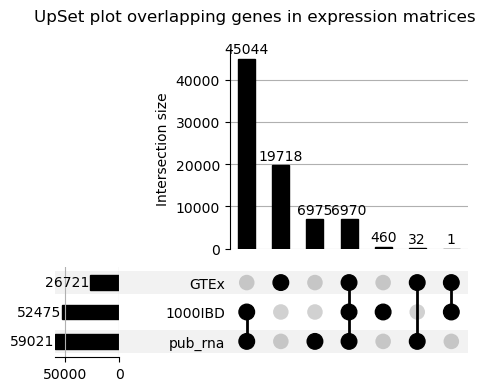

In [14]:
# upset plot of all datasets (gtex, werna, pub)
set1 = set(pub["-"])
set2 = set(werna["-"])
set3 = set(gtex["-"])

set_names = ['pub_rna', '1000IBD', 'GTEx']
all_elems = set1.union(set2).union(set3)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot overlapping genes in expression matrices")
plt.show()

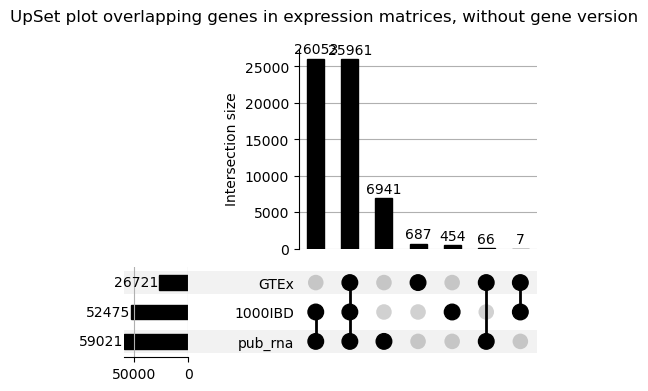

In [15]:
# upset plot of all datasets (gtex, werna, pub)
set1 = set(pub["-"].str.split('.').str[0])
set2 = set(werna["-"].str.split('.').str[0])
set3 = set(gtex["-"].str.split('.').str[0])

set_names = ['pub_rna', '1000IBD', 'GTEx']
all_elems = set1.union(set2).union(set3)
all_genes_set = pd.DataFrame([[e in set1, e in set2, e in set3] for e in all_elems], columns = set_names)
df_up = all_genes_set.groupby(set_names).size()
plot(df_up, orientation='horizontal', show_counts=True, sort_by="cardinality")
plt.suptitle("UpSet plot overlapping genes in expression matrices, without gene version")
plt.show()